In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

In [3]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weights = np.random.randn(3) * 1e-4     #small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"initial weights before training: \n{self.weights}")
        self.eta = eta
        self.epochs = epochs

    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
        
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
        
    def fit(self, X, y, ):
        self.X = X
        self.y = y

        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")

        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"Predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"Error: \n{self.error}")

            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"Updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print("##"*10)
            
    def predict(self, test_input):
        test_with_bias = np.c_[test_input, -np.ones((len(test_input), 1))]
        z = self._z_outcome(test_with_bias, self.weights)
        return self.activation_function(z)

    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\nTotal loss: {total_loss}")
        return total_loss

    def _create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
        
    def save(self, filename, model_dir=None):
        if model_dir is not None:
            model_path_file = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_path_file = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_path_file)

    def load(self, filepath):
        return joblib.load(filepath)

In [4]:
def prepare_data(df, target_col="y"):
    X = df.drop("y", axis=1)
    y = df["y"]
    return X, y

In [5]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,0,0,1],
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [6]:
X, y = prepare_data(df_AND)

ETA = 0.1
EPOCHS = 10

model_AND = Perceptron(eta=ETA, epochs=EPOCHS)
model_AND.fit(X, y)
_ = model_AND.total_loss()

initial weights before training: 
[ 7.61576110e-05 -6.48334044e-05 -3.41736426e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
Predicted value after forward pass: 
[1 0 1 1]
Error: 
0   -1
1    0
2   -1
3    0
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[-9.99238424e-02 -6.48334044e-05  1.99965826e-01]
####################
--------------------
for epoch >> 1
--------------------
Predicted value after forward pass: 
[0 0 0 0]
Error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[7.61576110e-05 9.99351666e-02 9.99658264e-02]
####################
--------------------
for epoch >> 2
--------------------
Predicted value after forward pass: 
[0 0 0 1]
Error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 3/10: 
[7.61576110e-05 9.99351666e-02 9.99658264e-02]
####################
--------------------
for epoch >> 3
----

In [7]:
model_AND.save(filename="and.model")

In [8]:
reload_and_model = Perceptron().load(filepath="model/and.model")

In [9]:
reload_and_model.predict(test_input=[[1,1]])

array([1])

In [10]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1],
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [11]:
X, y = prepare_data(df_OR)

ETA = 0.1
EPOCHS = 10

model_OR = Perceptron(eta=ETA, epochs=EPOCHS)
model_OR.fit(X, y)
_ = model_OR.total_loss()

initial weights before training: 
[-4.11823394e-05  2.09281227e-05  3.40533111e-06]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
Predicted value after forward pass: 
[0 1 0 0]
Error: 
0    0
1    0
2    1
3    1
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[ 0.19995882  0.10002093 -0.19999659]
####################
--------------------
for epoch >> 1
--------------------
Predicted value after forward pass: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[ 0.19995882  0.10002093 -0.09999659]
####################
--------------------
for epoch >> 2
--------------------
Predicted value after forward pass: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 3/10: 
[1.99958818e-01 1.00020928e-01 3.40533111e-06]
####################
--------------------
for epoch >> 3
--------------------
Pred

In [12]:
model_OR.save(filename="or.model")

In [13]:
reload_or_model = Perceptron().load(filepath="model/or.model")

In [14]:
reload_or_model.predict(test_input=[[5,2]])

array([1])

In [15]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0],
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [16]:
X, y = prepare_data(df_XOR)

ETA = 0.1
EPOCHS = 10

model_XOR = Perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)
_ = model_XOR.total_loss()

initial weights before training: 
[-3.25138293e-05 -6.40095532e-05 -5.58141229e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
Predicted value after forward pass: 
[1 0 1 0]
Error: 
0   -1
1    1
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[-3.25138293e-05  9.99359904e-02 -5.58141229e-05]
####################
--------------------
for epoch >> 1
--------------------
Predicted value after forward pass: 
[1 1 1 1]
Error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[-1.00032514e-01 -6.40095532e-05  1.99944186e-01]
####################
--------------------
for epoch >> 2
--------------------
Predicted value after forward pass: 
[0 0 0 0]
Error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch: 3/10: 
[-3.25138293e-05  9.99359904e-02 -5.58141229e-05]
####################
--------------------
for epoch >> 

In [24]:
def save_plot(df, model, filename="plot.png", plot_dir="plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)

        figure = plt.gcf()
        figure.set_size_inches(10, 8)
        
    def _plot_decision_regions(X, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        X = X.values #as an array
        x1 = X[:, 0]
        x2 = X[:, 1]

        x1_min, x1_max = x1.min() - 1, x1.max() + 1 
        x2_min, x2_max = x2.min() - 1, x2.max() + 1 
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution)
                              )
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)

        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        plt.plot()
        
    X, y = prepare_data(df)

    _create_base_plot(df)
    _plot_decision_regions(X, y, model)

    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

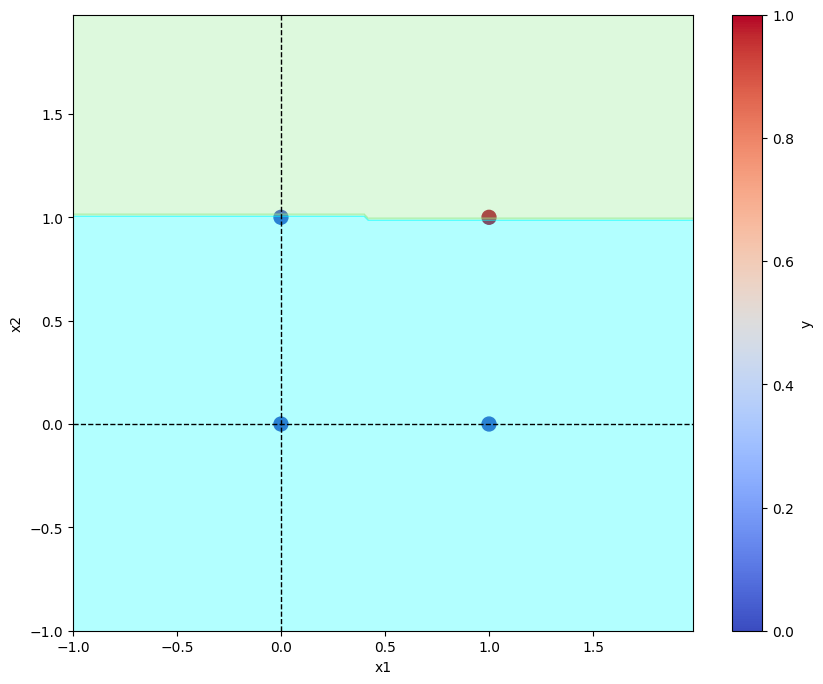

In [25]:
save_plot(df_AND, model_AND, filename="plot.png")